In [32]:
import pandas as pd
import os
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
read_cfg = {'decimal': ',',
            'thousands': '.', 
            'parse_dates': [4],
            'date_parser': lambda date: pd.datetime.strptime(date, '%d/%m/%Y')
           }

In [3]:
columns_rename = {'TIPO DE PAGAMENTO': 'tipo_pagamento',
                  'VALOR (R$)': 'valor',
                  'CPF': 'cpf',
                  'NOME': 'nome',
                  'PROJETO': 'projeto',
                  'DATA': 'data'}

# Leitura dos arquivos

In [4]:
DATA_DIR = r"..\data\raw\fcpc\pagamento pessoa fisica"
filenames = os.listdir(DATA_DIR)

df = pd.DataFrame()

for filename in filenames:
    
    df_ = pd.read_csv(os.path.join(DATA_DIR, filename), **read_cfg)
    df_['filename'] = filename
    
    df = df.append(df_, ignore_index=True)
    
df.rename(columns=columns_rename, inplace=True)

# Análise

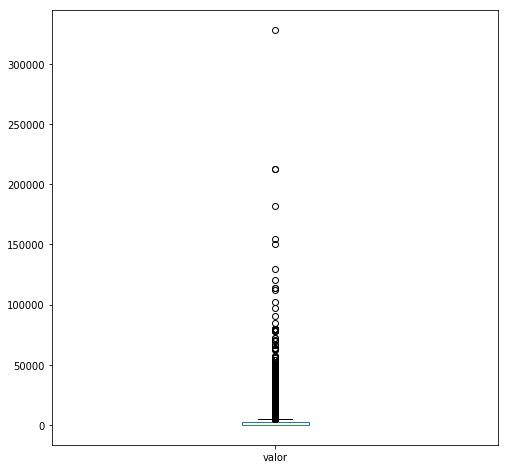

In [139]:
df.valor.plot(kind='box', figsize=(8, 8))

### Maior pagamento

In [140]:
df.nlargest(1, 'valor').T

,122957
cpf,***.839.713-**
nome,FRANCISCO EDUARDO ARAUJO SOARES
tipo_pagamento,SERVIÇO PRESTADO - RPA
projeto,3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO ...
data,2016-12-19 00:00:00
valor,328429
filename,2016.csv


### Maior média de pagamentos

In [141]:
df.groupby('nome')\
.valor.mean()\
.nlargest(10)

nome
FRANCISCO QUEIROZ D. NETO              129933.180000
FRANCISCO EDUARDO ARAUJO SOARES        112204.215556
FRANCISCO SULIANO MESQUITA DE PAULA     81344.097778
ALEXANDER DE SOUZA LARANJEIRA           70283.894000
ALEXANDRE CUNHA COSTA                   69500.000000
FAUSTO NILO COSTA JUNIOR                68327.847273
RUBENS FERNANDES NUNES                  58036.250000
ROBERTA SALES LINHARES                  57200.000000
DELBERG PONCE DE LEON                   54225.118000
JOSE LASSANCE DE CASTRO SILVA           53976.730000
Name: valor, dtype: float64

### Maior quantidade de pagamentos

In [142]:
df.groupby('nome')\
.size()\
.nlargest(10)

nome
FRANCISCO RODRIGO PORTO CAVALCANTI    259
RAIMUNDO MENDES DA SILVA              221
RONALDO GLAUBER MAIA DE OLIVEIRA      215
CARLOS CHAGAS CAVALCANTE FREIRE       193
ANTONIO VALDO BARROS DE SOUSA         192
JAVAM DE CASTRO MACHADO               187
GLAUCIANY KELLY CAVALCANTE CAMARA     174
DANIEL TEIXEIRA AGUIAR                166
GABRIELLE SILVA MARINHO               164
ANTONIO FALCAO NETO                   159
dtype: int64

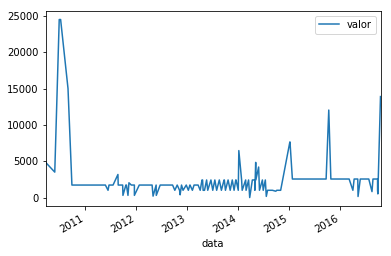

In [161]:
df[df.nome == 'FRANCISCO RODRIGO PORTO CAVALCANTI'].plot(x='data', y='valor')

In [162]:
mais_7_anos = df.groupby('nome')\
.filter(lambda g: len(g.data.dt.year.unique()) > 7)


media_anual = mais_7_anos\
.groupby(['nome', df.data.dt.year])\
.valor.mean()\
.unstack()

os_maiores = mais_7_anos.groupby('nome').valor.sum().nlargest(3)
os_maiores

nome
JAVAM DE CASTRO MACHADO              802283.12
FRANCISCO VANILSON PINHEIRO LEITE    779393.29
RAQUEL DE MELO ROLIM                 778440.00
Name: valor, dtype: float64

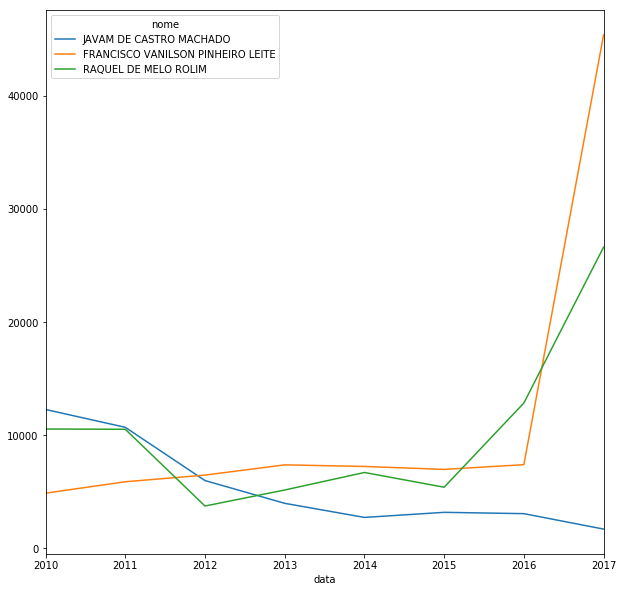

In [163]:
media_anual.loc[os_maiores.index].T.plot(figsize=(10, 10))

### Meses com mais pagamentos

In [171]:
tipos_mais_freq = df.tipo_pagamento.value_counts().nlargest(4)

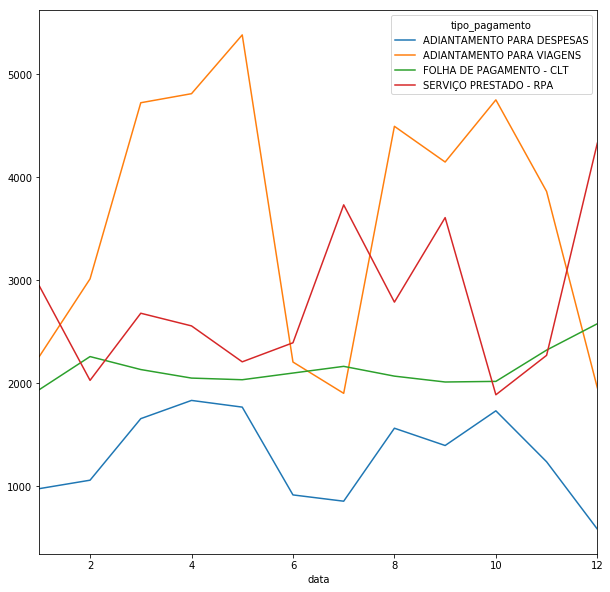

In [177]:
df[df.tipo_pagamento.isin(tipos_mais_freq.index)]\
.groupby([df.data.dt.month, 'tipo_pagamento'])\
.size().unstack()\
.plot(figsize=(10, 10))

### Meses com maiores pagamentos

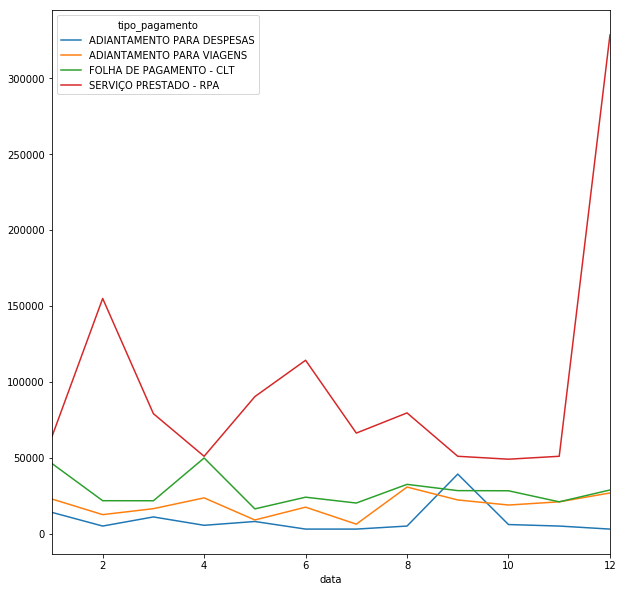

In [176]:
df[df.tipo_pagamento.isin(tipos_mais_freq.index)]\
.groupby([df.data.dt.month, 'tipo_pagamento'])\
.valor.max().unstack()\
.plot(figsize=(10, 10))